# **IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# **DATA UNDERSTANDING**


In [2]:
data= pd.read_csv('/content/StudentPerformanceFactors.csv')
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
cat_cols = data.select_dtypes(include='object').columns
for i in cat_cols:
  print(f"\nColumn: {i}")
  print(data[i].value_counts(dropna=False))


Column: Parental_Involvement
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

Column: Access_to_Resources
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64

Column: Extracurricular_Activities
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64

Column: Motivation_Level
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64

Column: Internet_Access
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64

Column: Family_Income
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64

Column: Teacher_Quality
Teacher_Quality
Medium    3925
High      1947
Low        657
NaN         78
Name: count, dtype: int64

Column: School_Type
School_Type
Public     4598
Private    2009
Name: count, dtype: int64

Column: Peer_Influence
Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int6

In [6]:
data[cat_cols].mode().iloc[0]
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(data[col].value_counts(normalize=True,dropna=False) * 100) #PERCENTAGE OF EACH DISTRIBUTION


Column: Parental_Involvement
Parental_Involvement
Medium    50.885425
High      28.878462
Low       20.236113
Name: proportion, dtype: float64

Column: Access_to_Resources
Access_to_Resources
Medium    50.234600
High      29.892538
Low       19.872862
Name: proportion, dtype: float64

Column: Extracurricular_Activities
Extracurricular_Activities
Yes    59.603451
No     40.396549
Name: proportion, dtype: float64

Column: Motivation_Level
Motivation_Level
Medium    50.718934
Low       29.317391
High      19.963675
Name: proportion, dtype: float64

Column: Internet_Access
Internet_Access
Yes    92.447404
No      7.552596
Name: proportion, dtype: float64

Column: Family_Income
Family_Income
Low       40.441956
Medium    40.351143
High      19.206902
Name: proportion, dtype: float64

Column: Teacher_Quality
Teacher_Quality
Medium    59.406690
High      29.468745
Low        9.943999
NaN        1.180566
Name: proportion, dtype: float64

Column: School_Type
School_Type
Public     69.592856
Pr

In [7]:
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n{col}")
    print(data[col].unique())


Parental_Involvement
['Low' 'Medium' 'High']

Access_to_Resources
['High' 'Medium' 'Low']

Extracurricular_Activities
['No' 'Yes']

Motivation_Level
['Low' 'Medium' 'High']

Internet_Access
['Yes' 'No']

Family_Income
['Low' 'Medium' 'High']

Teacher_Quality
['Medium' 'High' 'Low' nan]

School_Type
['Public' 'Private']

Peer_Influence
['Positive' 'Negative' 'Neutral']

Learning_Disabilities
['No' 'Yes']

Parental_Education_Level
['High School' 'College' 'Postgraduate' nan]

Distance_from_Home
['Near' 'Moderate' 'Far' nan]

Gender
['Male' 'Female']


# **DATA CLEANING**

IS NULL CLEANING

In [8]:
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [9]:
data['Teacher_Quality'].value_counts(normalize=True,dropna=False)*100

,proportion
Teacher_Quality,
Medium,59.406690
High,29.468745
Low,9.943999
NaN,1.180566


In [10]:
data['Parental_Education_Level'].value_counts(normalize=True,dropna=False)*100

,proportion
Parental_Education_Level,
High School,48.781595
College,30.104435
Postgraduate,19.751778
NaN,1.362192


In [11]:
data['Distance_from_Home'].value_counts(normalize=True,dropna=False)*100

,proportion
Distance_from_Home,
Near,58.786136
Moderate,30.240654
Far,9.959134
NaN,1.014076


Drop NAN cuz its small percentage of the data

In [12]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

In [13]:
data.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Duplicate Cleaning

In [14]:
data.duplicated().sum()

np.int64(0)

#**EDA AND OUTLIERS DETECTION**

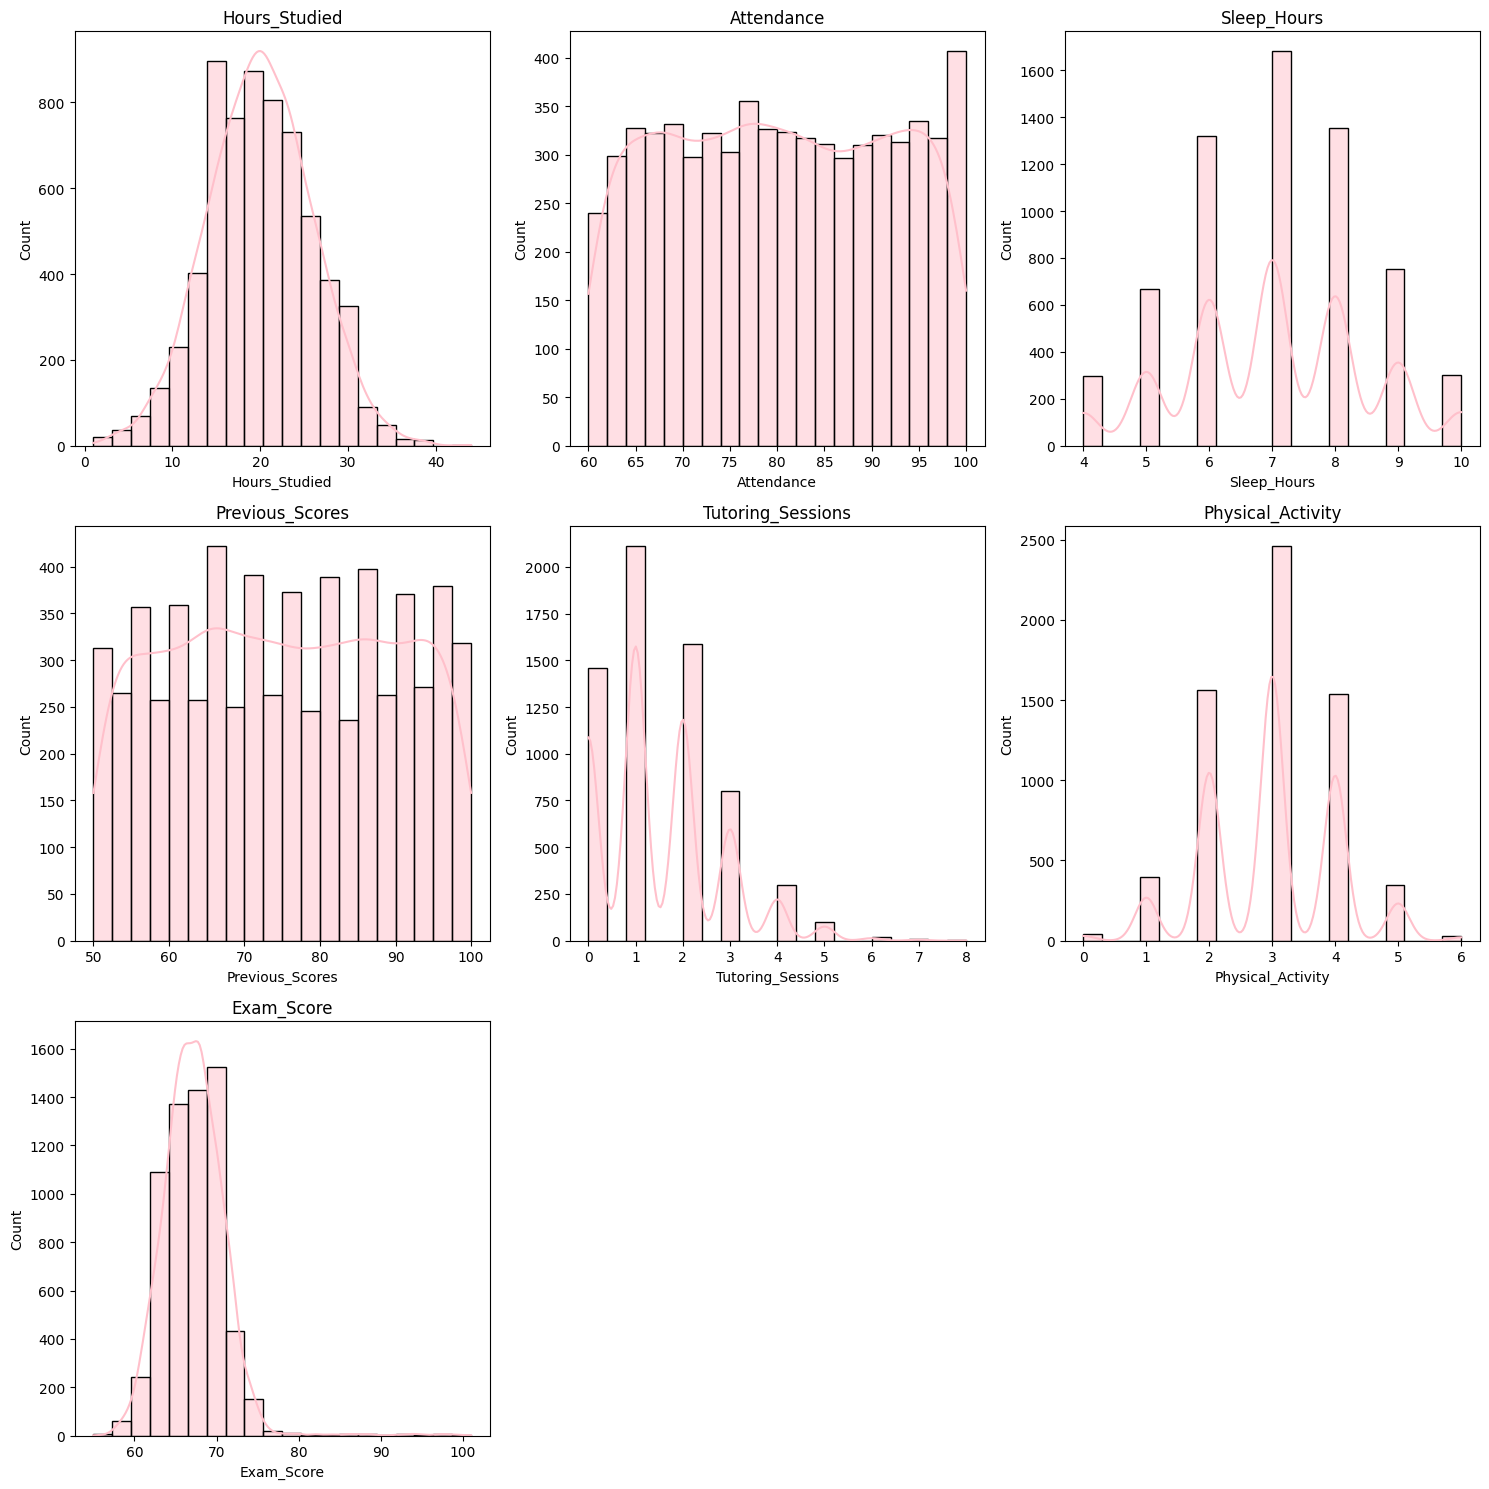

In [15]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], bins=20, kde=True, color='pink')
    plt.title(col)
plt.tight_layout()
plt.show()

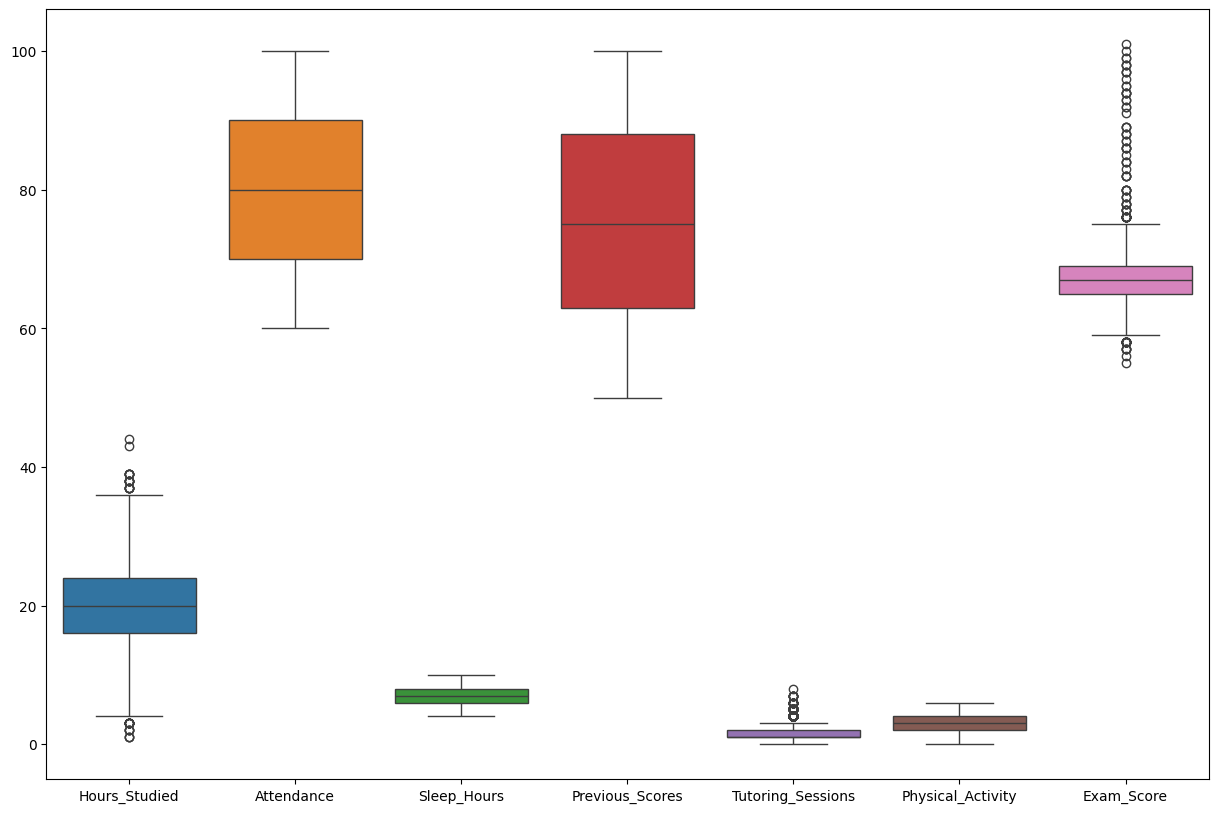

In [16]:
plt.figure(figsize=(15,10))
sns.boxplot(data)
plt.show()

In [17]:
data[data['Exam_Score'] > 100]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [18]:
(data['Exam_Score'] > 100).sum()

np.int64(1)

In [19]:
data['Tutoring_Sessions'].max()

8

In [20]:
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((data[col] < lower) | (data[col] > upper)).sum()
    outlier_pct = outliers / len(data[col]) * 100
    print(f"{col}: {outliers} outliers , percentage: {outlier_pct}")
    #Capping outliers using lambda
    data[col] = data[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

Hours_Studied: 40 outliers , percentage: 0.6271558482282847
Attendance: 0 outliers , percentage: 0.0
Sleep_Hours: 0 outliers , percentage: 0.0
Previous_Scores: 0 outliers , percentage: 0.0
Tutoring_Sessions: 423 outliers , percentage: 6.632173095014111
Physical_Activity: 0 outliers , percentage: 0.0
Exam_Score: 103 outliers , percentage: 1.6149263091878332


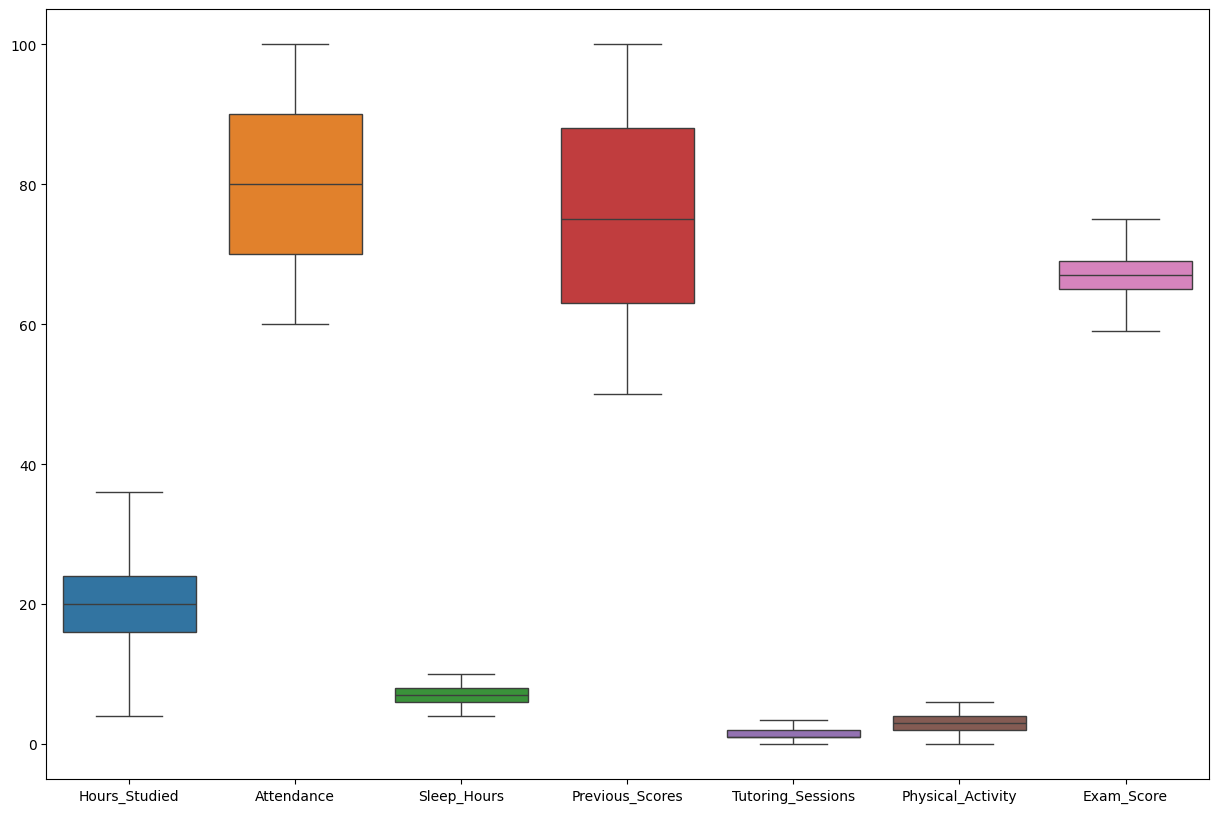

In [21]:
plt.figure(figsize=(15,10))
sns.boxplot(data)
plt.show()

/tmp/ipython-input-3157502447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="pastel")


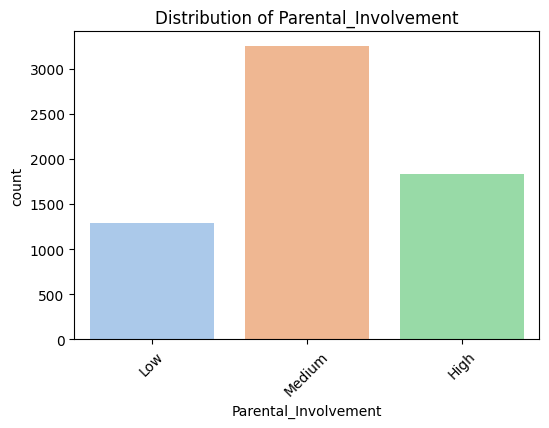

/tmp/ipython-input-3157502447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="pastel")


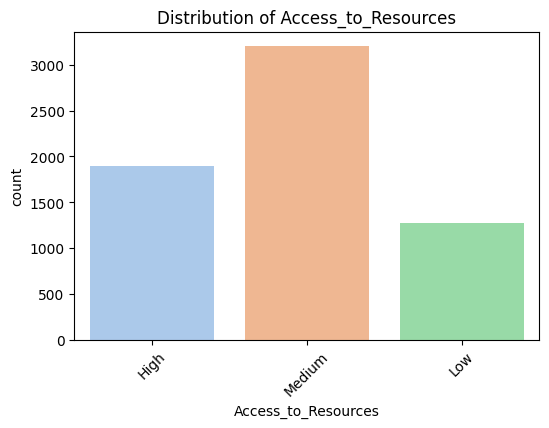

/tmp/ipython-input-3157502447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="pastel")


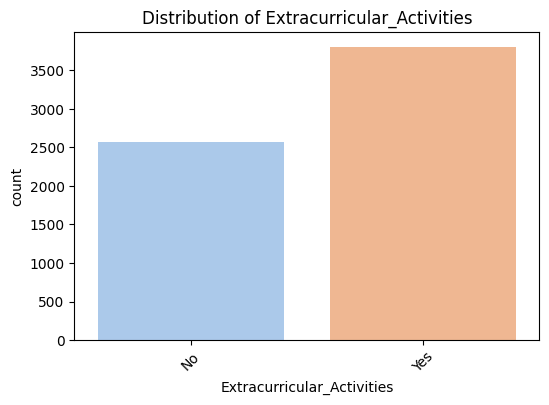

/tmp/ipython-input-3157502447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="pastel")


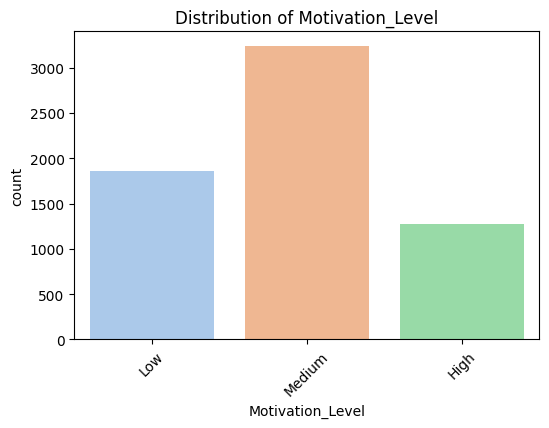

/tmp/ipython-input-3157502447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="pastel")


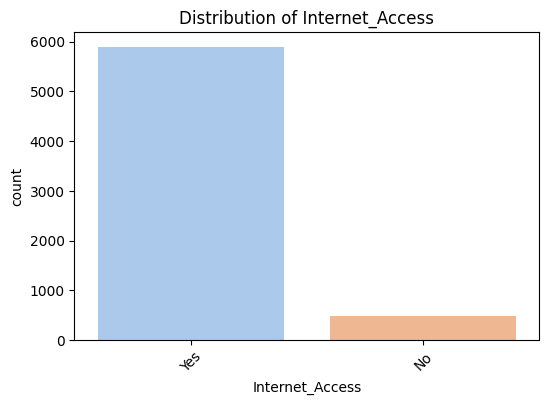

/tmp/ipython-input-3157502447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="pastel")


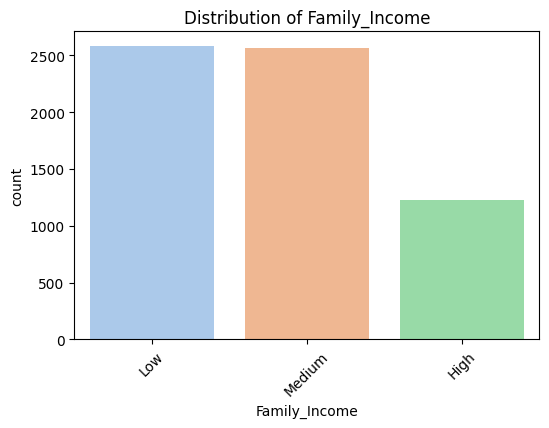

/tmp/ipython-input-3157502447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="pastel")


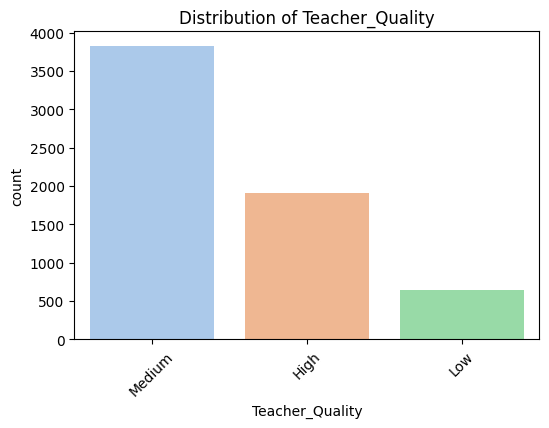

/tmp/ipython-input-3157502447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="pastel")


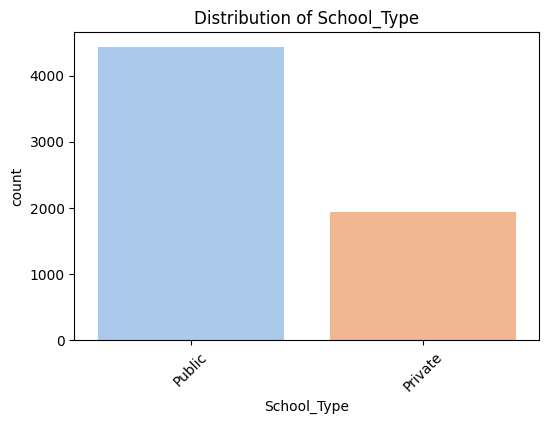

/tmp/ipython-input-3157502447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="pastel")


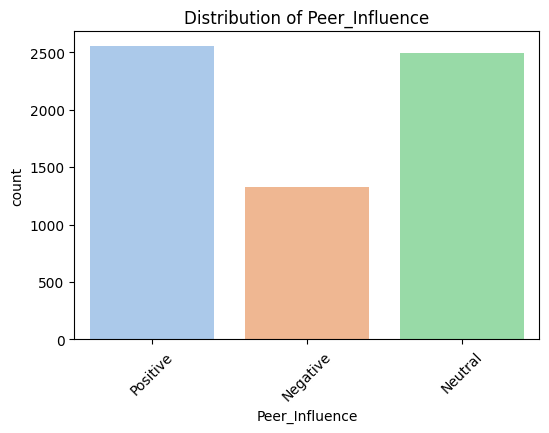

/tmp/ipython-input-3157502447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="pastel")


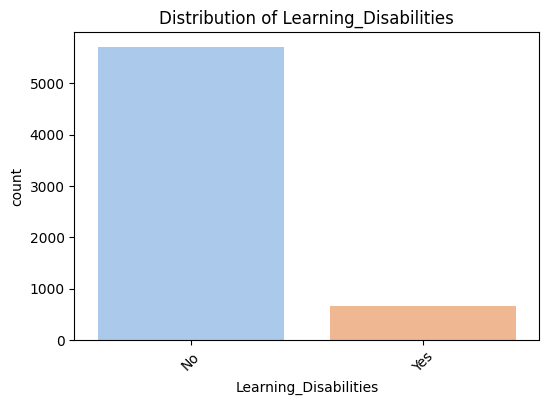

/tmp/ipython-input-3157502447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="pastel")


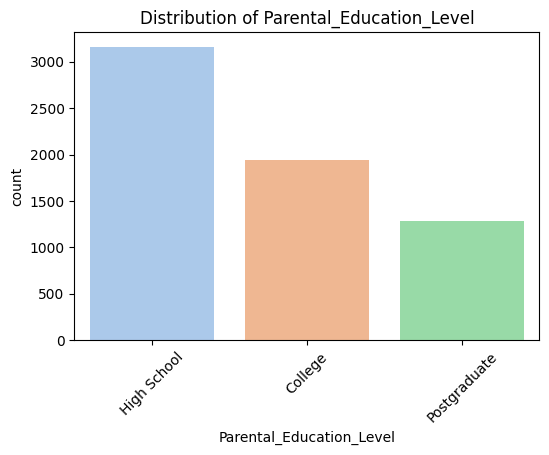

/tmp/ipython-input-3157502447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="pastel")


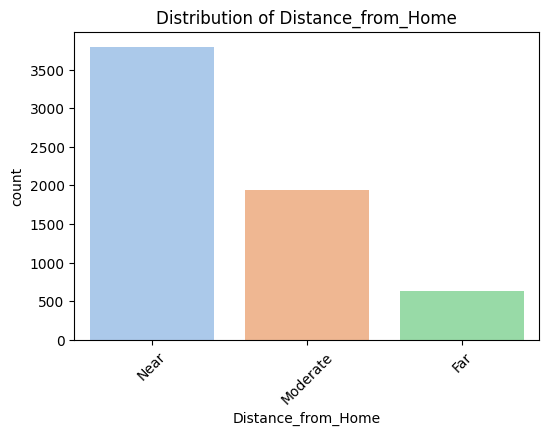

/tmp/ipython-input-3157502447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="pastel")


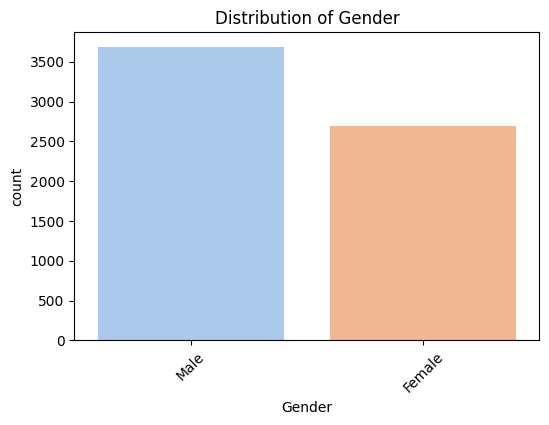

In [22]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=data, palette="pastel")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

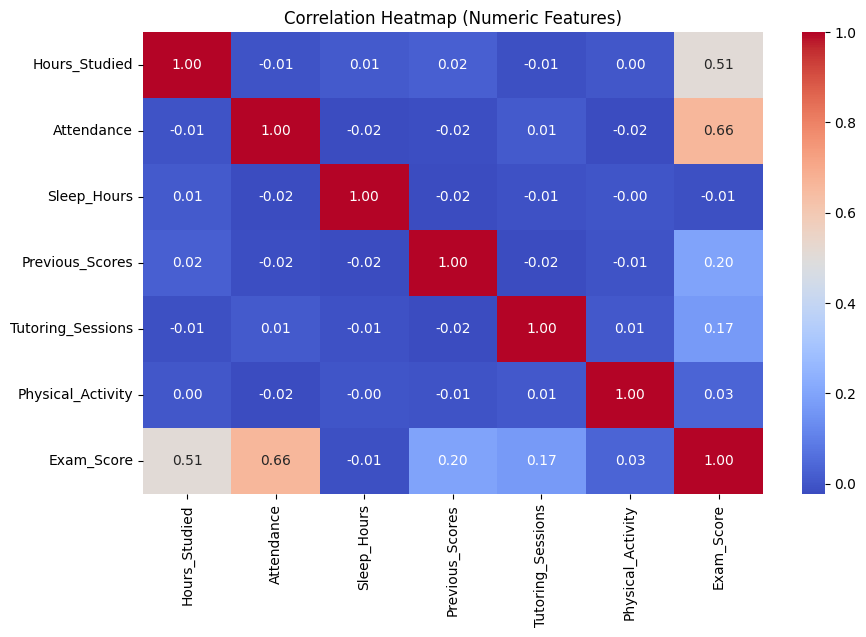

In [23]:
plt.figure(figsize=(10,6))
corr = data[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

/tmp/ipython-input-3400429152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Exam_Score", data=data, palette="pastel")


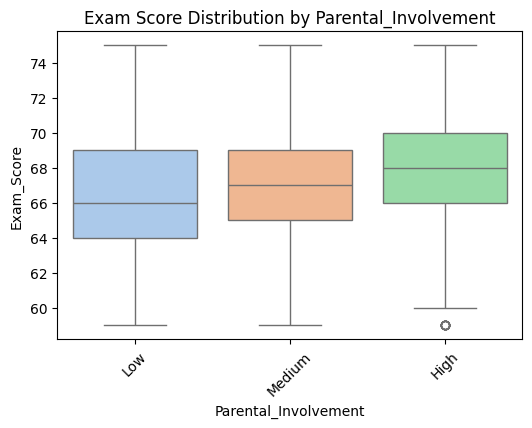

/tmp/ipython-input-3400429152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Exam_Score", data=data, palette="pastel")


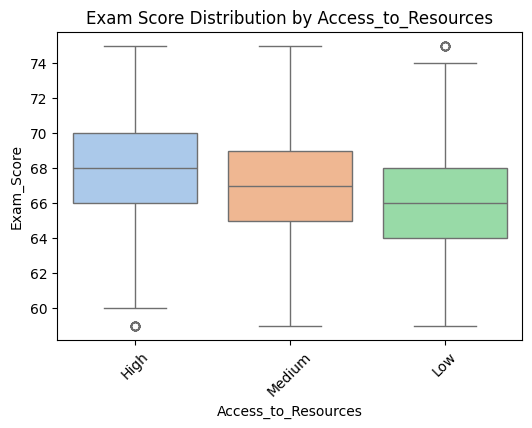

/tmp/ipython-input-3400429152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Exam_Score", data=data, palette="pastel")


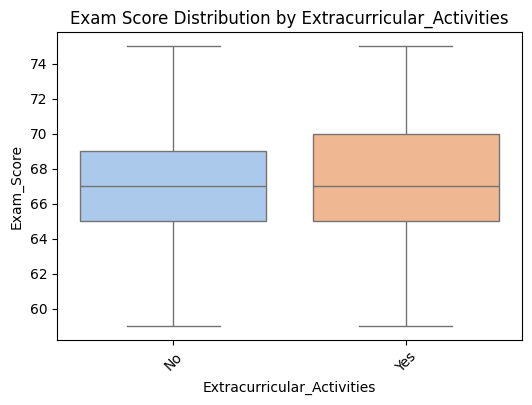

/tmp/ipython-input-3400429152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Exam_Score", data=data, palette="pastel")


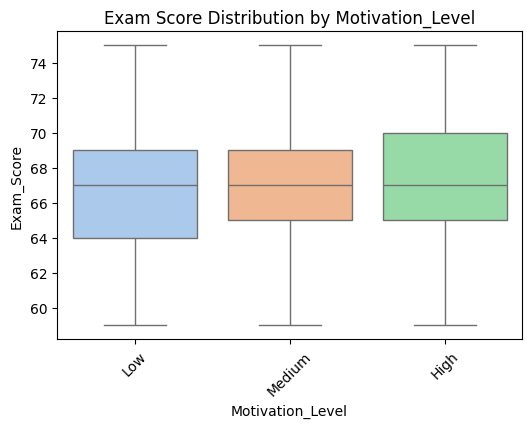

/tmp/ipython-input-3400429152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Exam_Score", data=data, palette="pastel")


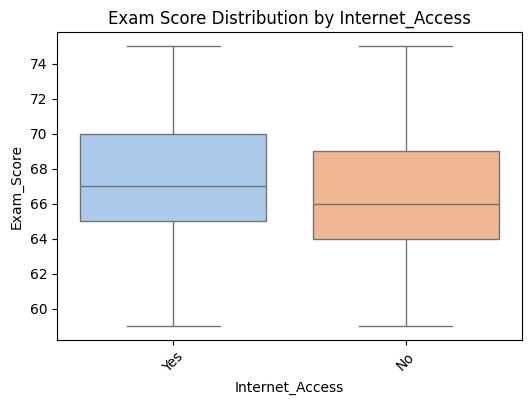

/tmp/ipython-input-3400429152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Exam_Score", data=data, palette="pastel")


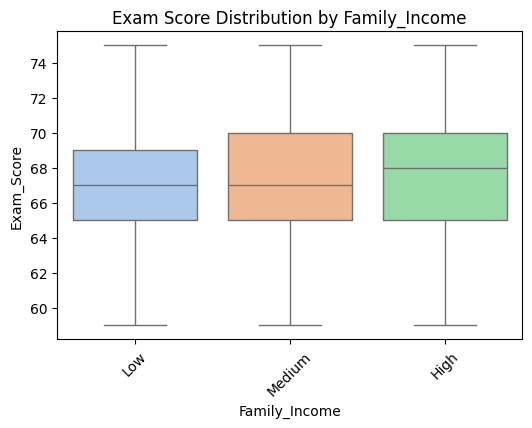

/tmp/ipython-input-3400429152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Exam_Score", data=data, palette="pastel")


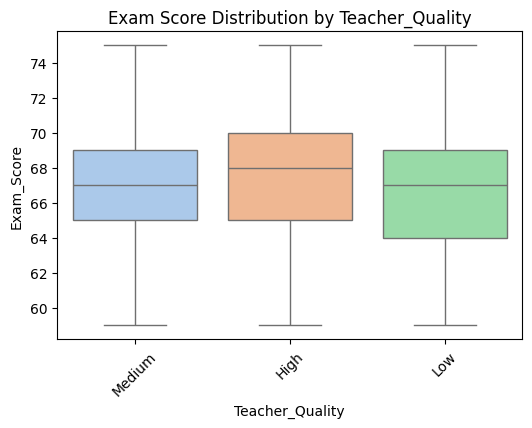

/tmp/ipython-input-3400429152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Exam_Score", data=data, palette="pastel")


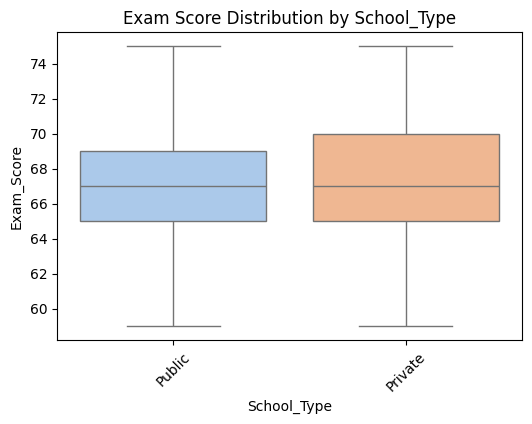

/tmp/ipython-input-3400429152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Exam_Score", data=data, palette="pastel")


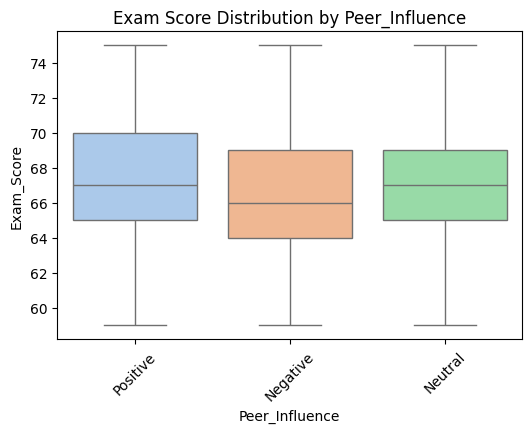

/tmp/ipython-input-3400429152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Exam_Score", data=data, palette="pastel")


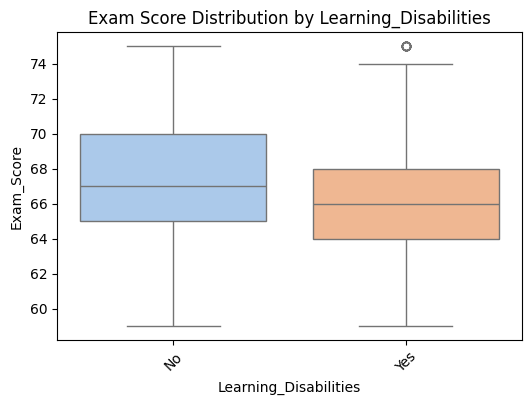

/tmp/ipython-input-3400429152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Exam_Score", data=data, palette="pastel")


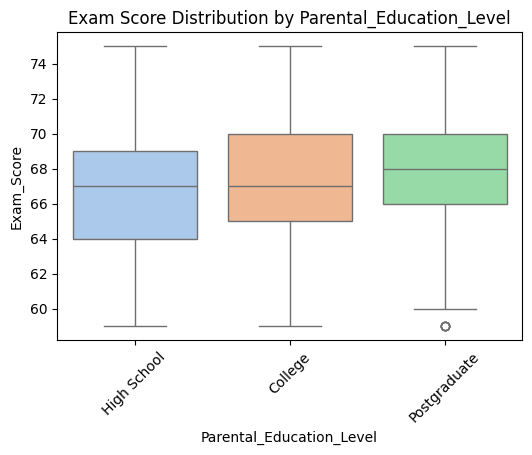

/tmp/ipython-input-3400429152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Exam_Score", data=data, palette="pastel")


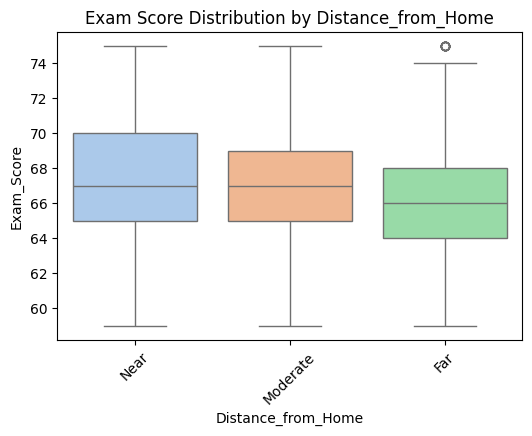

/tmp/ipython-input-3400429152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Exam_Score", data=data, palette="pastel")


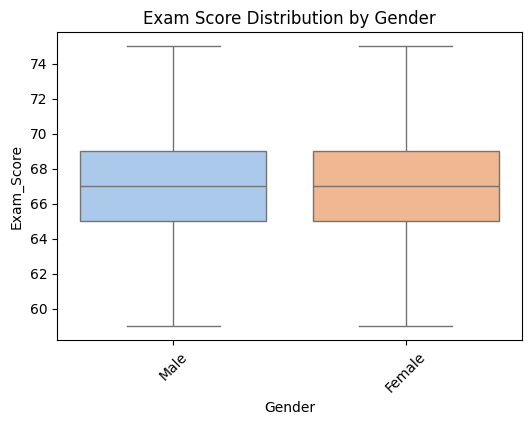

In [24]:
cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, y="Exam_Score", data=data, palette="pastel")
    plt.title(f"Exam Score Distribution by {col}")
    plt.xticks(rotation=45)
    plt.show()

In [25]:
for col in cat_cols:
    print(f"\nAverage Exam Score by {col}:")
    print(data.groupby(col)["Exam_Score"].mean())


Average Exam Score by Parental_Involvement:
Parental_Involvement
High      67.958061
Low       66.254067
Medium    67.028914
Name: Exam_Score, dtype: float64

Average Exam Score by Access_to_Resources:
Access_to_Resources
High      67.961579
Low       66.166405
Medium    67.039014
Name: Exam_Score, dtype: float64

Average Exam Score by Extracurricular_Activities:
Extracurricular_Activities
No     66.864644
Yes    67.325190
Name: Exam_Score, dtype: float64

Average Exam Score by Motivation_Level:
Motivation_Level
High      67.619421
Low       66.659335
Medium    67.226753
Name: Exam_Score, dtype: float64

Average Exam Score by Internet_Access:
Internet_Access
No     66.393814
Yes    67.200916
Name: Exam_Score, dtype: float64

Average Exam Score by Family_Income:
Family_Income
High      67.648780
Low       66.764136
Medium    67.273188
Name: Exam_Score, dtype: float64

Average Exam Score by Teacher_Quality:
Teacher_Quality
High      67.540157
Low       66.669243
Medium    67.019603
Name

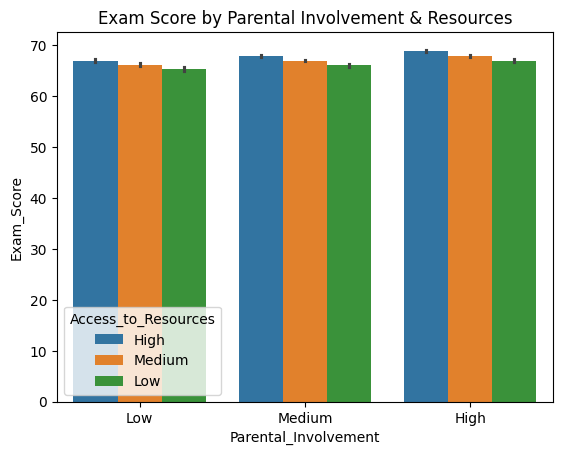

In [26]:
sns.barplot(x="Parental_Involvement", y="Exam_Score", hue="Access_to_Resources", data=data)
plt.title("Exam Score by Parental Involvement & Resources")
plt.show()

# **Feature Encoding**

In [27]:
cat_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols.tolist())

Categorical columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [28]:
for col in cat_cols:
    print(f"{col}: {data[col].nunique()} unique values")

Parental_Involvement: 3 unique values
Access_to_Resources: 3 unique values
Extracurricular_Activities: 2 unique values
Motivation_Level: 3 unique values
Internet_Access: 2 unique values
Family_Income: 3 unique values
Teacher_Quality: 3 unique values
School_Type: 2 unique values
Peer_Influence: 3 unique values
Learning_Disabilities: 2 unique values
Parental_Education_Level: 3 unique values
Distance_from_Home: 3 unique values
Gender: 2 unique values


Label Encoding

In [31]:
ordinal_mappings = {
    'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2},
    'Access_to_Resources': {'Low': 0, 'Medium': 1, 'High': 2},
    'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2},
    'Teacher_Quality': {'Low': 0, 'Medium': 1, 'High': 2},
    'Parental_Education_Level': {'High School': 0, 'College': 1, 'Postgraduate': 2},
    'Distance_from_Home': {'Near': 0, 'Moderate': 1, 'Far': 2}
}

for col, mapping in ordinal_mappings.items():
    data[col] = data[col].map(mapping)

One Hot Encoding

In [32]:
cols_to_encode = ["Gender", "School_Type", "Peer_Influence"]
data = pd.get_dummies(data, columns=cols_to_encode, drop_first=True)

Binary Encoding (Yes/No features)

In [33]:
binary_cols = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']
for col in binary_cols:
    data[col] = data[col].map({'No': 0, 'Yes': 1})

In [34]:
data = data.apply(lambda col: col.astype(int) if col.dtypes == 'bool' else col)

Exam_Score                    1.000000
Attendance                    0.661918
Hours_Studied                 0.505917
Previous_Scores               0.195321
Access_to_Resources           0.185981
Parental_Involvement          0.176559
Tutoring_Sessions             0.170314
Parental_Education_Level      0.124010
Motivation_Level              0.100513
Family_Income                 0.099529
Peer_Influence_Positive       0.090366
Teacher_Quality               0.082363
Extracurricular_Activities    0.066817
Internet_Access               0.063276
Physical_Activity             0.034674
Gender_Male                   0.001349
Peer_Influence_Neutral       -0.009137
Sleep_Hours                  -0.014030
School_Type_Public           -0.014782
Learning_Disabilities        -0.098622
Distance_from_Home           -0.101572
Name: Exam_Score, dtype: float64


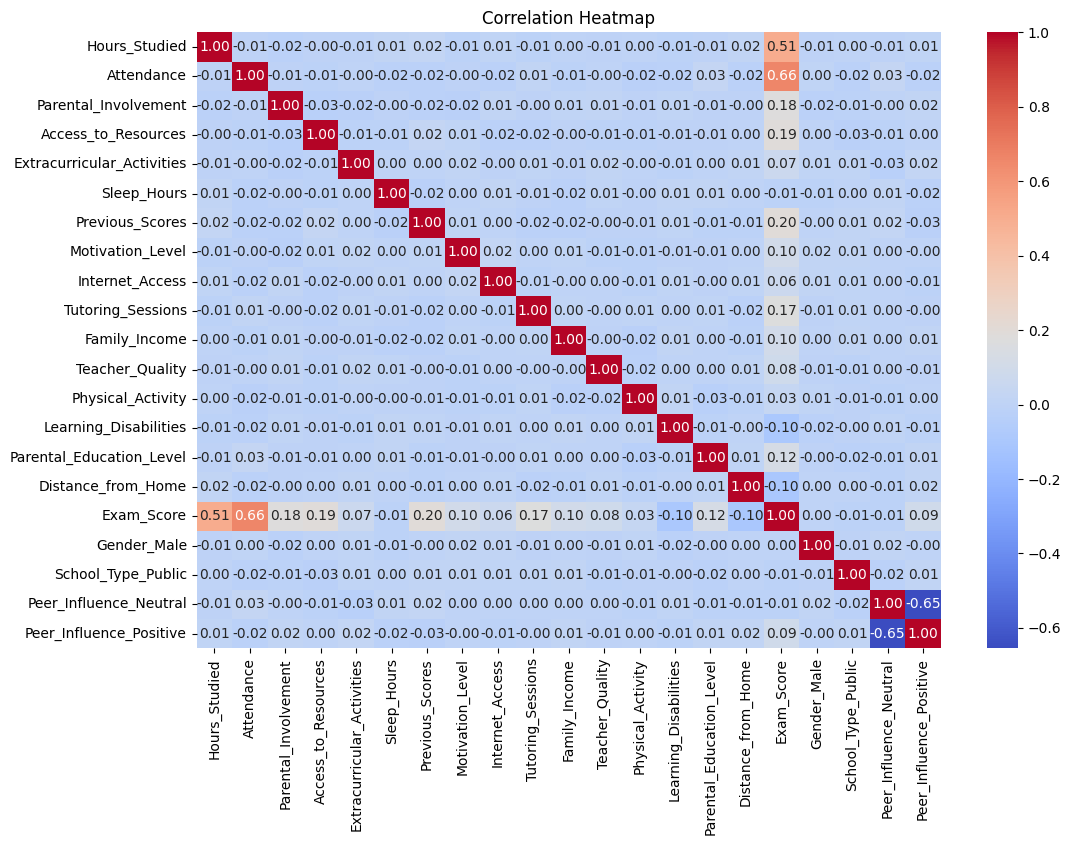

In [35]:
corr = data.corr(numeric_only=True)
target_corr = corr['Exam_Score'].sort_values(ascending=False)
print(target_corr)
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# **Model**

In [36]:
model= LinearRegression()

In [37]:
X = data.drop(columns=['Exam_Score'])
y = data['Exam_Score']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred=model.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay

In [43]:
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2: 0.9317789893664477
MAE: 0.36217934543627217
MSE: 0.7973429921431415


In [45]:
accuracy_score = model.score(X_test, y_test)
print("Accuracy Score:", accuracy_score)

Accuracy Score: 0.9317789893664477


TRY POLYNOMIAL

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [49]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [50]:
y_pred_linear = model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [51]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [52]:
print("Linear Regression:")
print("MSE:", mse_linear)
print("R²:", r2_linear)
print("\nPolynomial Regression (degree=2):")
print("MSE:", mse_poly)
print("R²:", r2_poly)

Linear Regression:
MSE: 0.7973429921431415
R²: 0.9317789893664477

Polynomial Regression (degree=2):
MSE: 0.8601940446919577
R²: 0.9264014261765614
